In [3]:
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/thedoctor/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [113]:
import pandas as pd
import datetime

df = pd.read_csv("premier_essai_instagram.csv", encoding='utf-8', index_col=0)
df = df[~df["node.edge_media_to_caption.edges"].isna()]
df["timestamp"] = pd.to_datetime(1000000000*df["node.taken_at_timestamp"])
march_df = df[df["timestamp"].apply(lambda d: d.month) ==3]
df["date"] = df["timestamp"].apply(lambda d: "%i-%i"%(int(d.year),int(d.month)) if d.year is not np.nan else ("2030-01"))

In [117]:
df["cited"] = df["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
df.to_csv("first_delivery.csv", encoding="utf-8")

In [125]:
pd.read_csv("first_delivery.csv")

,Unnamed: 0,caption,node.dimensions.height,node.dimensions.width,node.display_url,node.edge_liked_by.count,node.edge_media_preview_like.count,node.edge_media_to_caption.edges,node.edge_media_to_comment.count,node.id,...,node.owner.id,node.shortcode,node.taken_at_timestamp,node.thumbnail_resources,node.thumbnail_src,topic,username,timestamp,date,cited
0,0,"My favorite panorama over Paris, since the Gal...",718,1080,https://scontent-cdg2-1.cdninstagram.com/vp/99...,123,123,[{u'node': {u'text': u'My favorite panorama ov...,6,1755126051169700280,...,306904028,BhbddgwAQm4,1523447351,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/7a...,Galeries Lafayette,sarahsergentinparis,2018-04-11 11:49:11,2018-4,[]
1,0,#doitin_paris #mylittleparis #galerieslafayett...,1350,1080,https://scontent-cdg2-1.cdninstagram.com/vp/a8...,758,758,[{u'node': {u'text': u'#doitin_paris #mylittle...,15,1754504619625990761,...,2296505565,BhZQKfhlspp,1523373270,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/b9...,Galeries Lafayette,douceur_a_paris,2018-04-10 15:14:30,2018-4,[]
2,0,"If you’re in #Paris, be sure to stop by our be...",1080,1080,https://scontent-cdg2-1.cdninstagram.com/vp/82...,1056,1056,"[{u'node': {u'text': u'If you’re in #Paris, be...",14,1731878414308459063,...,211697575,BgI3j3vBcI3,1520676017,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/46...,Galeries Lafayette,aspinaloflondon,2018-03-10 10:00:17,2018-3,[]
3,0,Galeries Lafayette 👀⚡️ #ootd #paris #galeries...,1350,1080,https://scontent-cdg2-1.cdninstagram.com/vp/73...,393,393,[{u'node': {u'text': u'Galeries Lafayette 👀⚡️...,6,1744939506207213556,...,243488223,Bg3RTxeBsf0,1522233020,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/24...,Galeries Lafayette,elinestove,2018-03-28 10:30:20,2018-3,[]
4,0,"🇧🇷Maio em Paris: de 2/05 até 29/95, comemore...",1080,1080,https://scontent-cdg2-1.cdninstagram.com/vp/2c...,88,88,[{u'node': {u'text': u'🇧🇷Maio em Paris: de 2...,0,1755192038653315619,...,12395574,BhbsdwYhkoj,1523455217,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/71...,Galeries Lafayette,conexaoparis,2018-04-11 14:00:17,2018-4,[]
5,0,This view! ✨🙏🏻 Na ten taras trafiliśmy całki...,1350,1080,https://scontent-cdg2-1.cdninstagram.com/vp/62...,141,141,[{u'node': {u'text': u'This view! ✨🙏🏻 Na ten...,14,1755007017284913341,...,284536093,BhbCZVzlci9,1523433161,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/62...,Galeries Lafayette,monicabialucci,2018-04-11 07:52:41,2018-4,[]
6,0,hello! here some details of one of my favorite...,1080,1080,https://scontent-cdg2-1.cdninstagram.com/vp/c1...,5231,5231,[{u'node': {u'text': u'hello! here some detail...,52,1753888515744442917,...,297598187,BhXEFAElaol,1523299825,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/5c...,Galeries Lafayette,luvfromcaro,2018-04-09 18:50:25,2018-4,[commedesgarconsxplay]
7,0,Nenhuma visita a Paris é completa sem visitar ...,1080,1080,https://scontent-cdg2-1.cdninstagram.com/vp/21...,214,214,[{u'node': {u'text': u'Nenhuma visita a Paris ...,5,1734131255190168668,...,334578530,BgQ3zBTgyRc,1520944576,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/02...,Galeries Lafayette,viajandocomarte,2018-03-13 12:36:16,2018-3,[moda]
8,0,Études corner is now open @galerieslafayette H...,810,1080,https://scontent-cdg2-1.cdninstagram.com/vp/ec...,172,172,[{u'node': {u'text': u'Études corner is now op...,12,1738537004054044469,...,327215708,BgghjGrg181,1521469782,[{u'src': u'https://scontent-cdg2-1.cdninstagr...,https://scontent-cdg2-1.cdninstagram.com/vp/a4...,Galeries Lafayette,antoine_blk,2018-03-19 14:29:42,2018-3,[galerieslafayette]
9,0,"My favorite panorama over Paris, since the Gal.

In [106]:
list_edges_global = {}
for name, group in df.groupby("date"):
    if name in ["2017-11","2017-12", "2018-1", "2018-2", "2018-3", "2018-4"]:
        month_l = group["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
        month_l = month_l[month_l.apply(lambda ll: len(ll)) > 0]
        group_l.append(month_l)
        list_edges_month = []
        for list_cite, user in [(a,b) for a,b in zip(month_l, list(group["username"]))]:
            for citation in list_cite:
                list_edges_month.append((user, citation))
        list_edges_global[name] = (list_edges_month)

In [5]:
import re 

l = df["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
l = l[l.apply(lambda ll: len(ll)) > 0]

march_l = march_df["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
march_l = march_l[march_l.apply(lambda ll: len(ll)) > 0]

In [6]:
list_edges = []
list_edges_march = []
for list_cite, user in [(a,b) for a,b in zip(l, list(df["username"]))]:
    for citation in list_cite:
        list_edges.append((user, citation))
        
for list_cite, user in [(a,b) for a,b in zip(march_l, list(march_df["username"]))]:
    for citation in list_cite:
        list_edges_march.append((user, citation))

In [107]:
import numpy as np

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def draw_graph(G_prime, ax=None, fig=[10,10]):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain
    import networkx as nx

    partition = community_louvain.best_partition(G_prime)
    pos = community_layout(G_prime, partition)
    #plt.figure(figsize=fig)
    return nx.draw(G_prime, pos, node_color=partition.values(), ax=ax); plt.show()

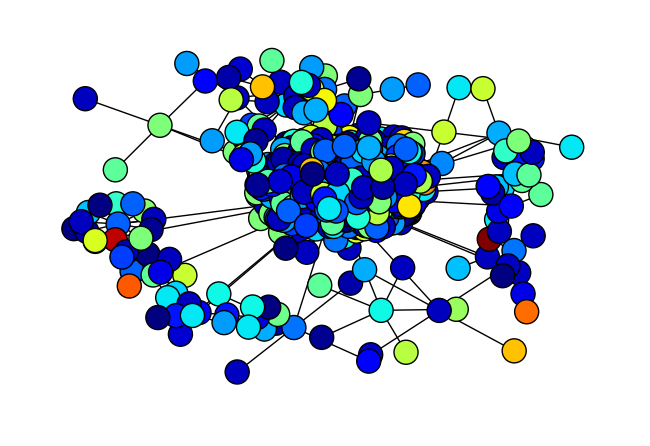

In [37]:
G=nx.Graph()
G.add_edges_from(list_edges)
G_prime = nx.subgraph(G, list(next(nx.connected_components(G))))
draw_graph(G_prime)

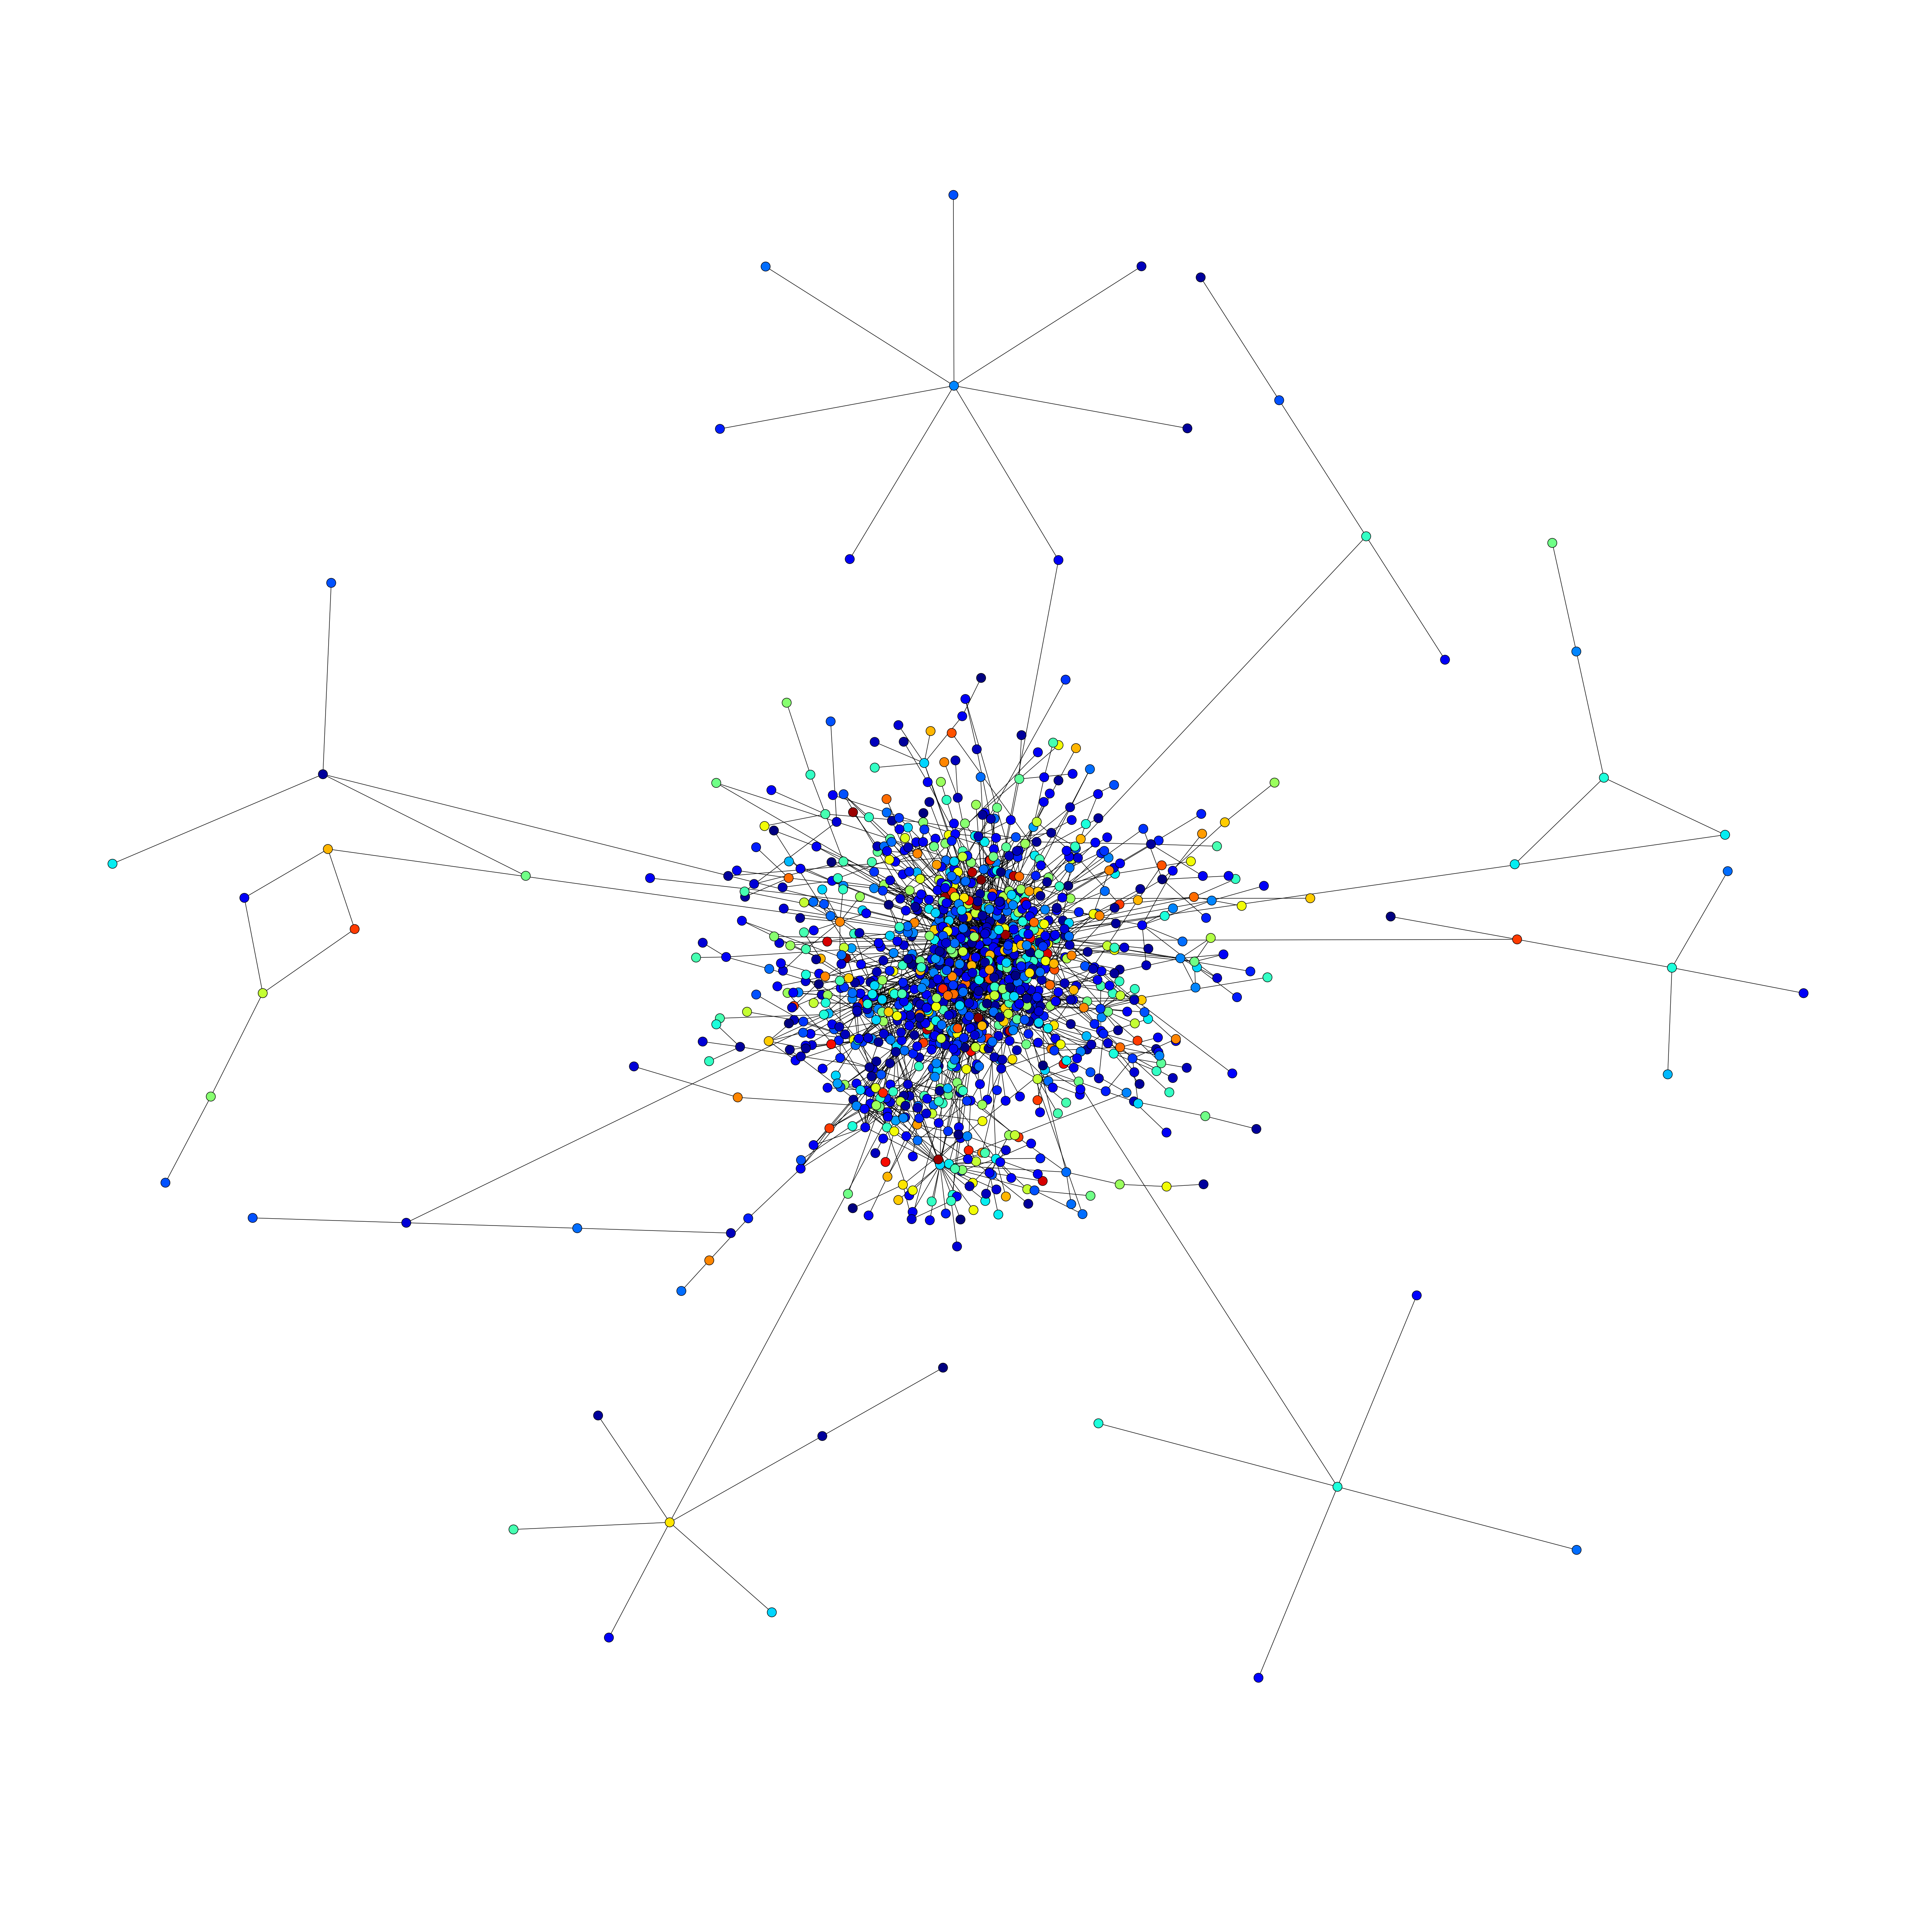

In [9]:
G_march=nx.Graph()
G_march.add_edges_from(list_edges_march)
G_prime_march = nx.subgraph(G_march, list(nx.connected_components(G_march))[1])
draw_graph(G_prime_march, [50,50])

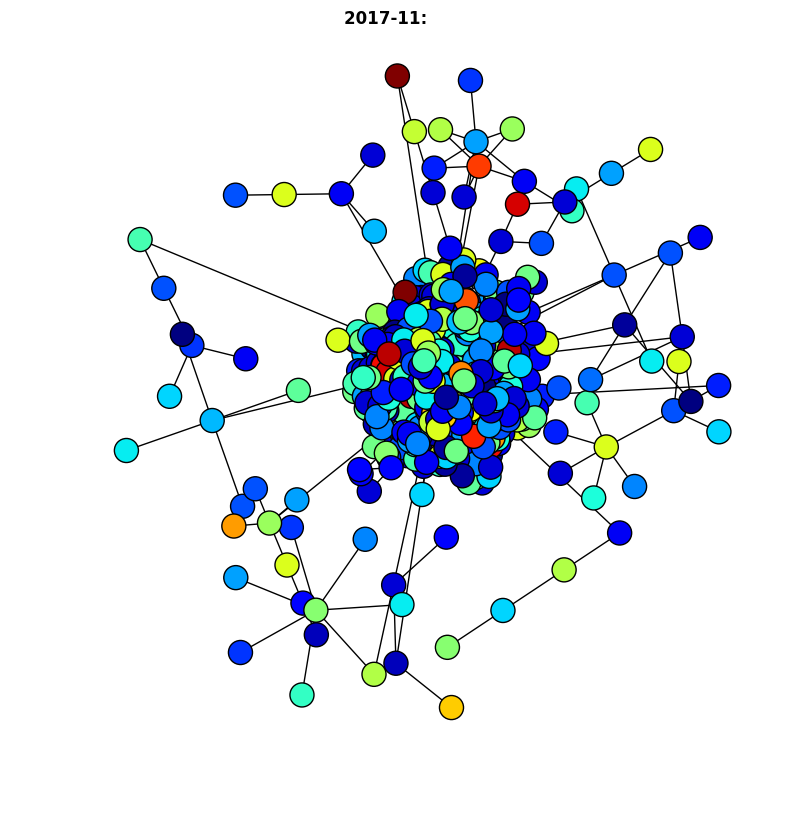

In [122]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation

G_list = []
name_list = ["2017-11","2017-12", "2018-1", "2018-2", "2018-3", "2018-4"]
for (name, group) in (df.groupby("date")):
    if name in name_list:
        G_m=nx.Graph()
        G_m.add_edges_from(list_edges_global[name])
        max_con = np.argmax([len(s) for s in list(nx.connected_components(G_m))])
        G_m_prime = nx.subgraph(G_m, list(nx.connected_components(G_m))[max_con]) 
        G_list.append(G_m_prime)
        



# Build plot
fig, ax = plt.subplots(figsize=[10,10])


def update(num):
    ax.clear()
    draw_graph(G_list[num], ax, fig=[50,50])

    # Scale plot ax
    ax.set_title("%s:    "%name_list[num], fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])


ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(G_list), interval=500, repeat=True)
ani

In [124]:
ani.save("animation_network.avi", writer="ffmpeg")